In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_squared_error

%matplotlib inline

# 1 - Z

In [2]:
from sklearn.svm import SVC
X = np.array([[-3,9], [-1,1], [0,0], [1,1], [2,4], [4,16]])
y = np.array([1,1, -1, -1, -1, 1])

clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(X, y) 

print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = \n', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[-1.33333333  0.66666667]]
b =  [-1.]
Indices of support vectors =  [2 4 1]
Support vectors = 
 [[ 0.  0.]
 [ 2.  4.]
 [-1.  1.]]
Number of support vectors for each class =  [2 1]
Coefficients of the support vector in the decision function =  [[1.         0.11111111 1.11111111]]


# 2
# Breast Cancer Coimbra Data Set

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.
The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.
Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.

Labels for classification:

1=Healthy controls

2=Patients

# 2-A
### For The Whole Data Set

In [3]:
df = pd.read_csv('dataR2.csv')
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [4]:
x = df.iloc[:, 0:9]
x

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [5]:
y = df.iloc[:, -1]
y

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size = 0.2)

print('shape of train sets are: ', x_train.shape, y_train.shape)
print('shape of validation sets are: ', x_val.shape, y_val.shape)
print('shape of test sets are: ', x_test.shape, y_test.shape)

shape of train sets are:  (104, 9) (104,)
shape of validation sets are:  (21, 9) (21,)
shape of test sets are:  (12, 9) (12,)


In [7]:
C = np.linspace(start = 10, stop = 100, num = 20)
C

array([ 10.        ,  14.73684211,  19.47368421,  24.21052632,
        28.94736842,  33.68421053,  38.42105263,  43.15789474,
        47.89473684,  52.63157895,  57.36842105,  62.10526316,
        66.84210526,  71.57894737,  76.31578947,  81.05263158,
        85.78947368,  90.52631579,  95.26315789, 100.        ])

In [8]:
rmse_train = []
rmse_val = []
rmse_test = []

for c in C:
    clf = svm.SVC(kernel='rbf', gamma='scale', C=c)
    clf.fit(x_train1, y_train1)

    y_train_pred = clf.predict(x_train1)
    train__rmse = rmse_train.append(np.sqrt(mean_squared_error(y_train1, y_train_pred)))

    y_val_pred = clf.predict(x_val)
    val__rmse = rmse_val.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

    y_test_pred = clf.predict(x_test)
    test__rmse = rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    

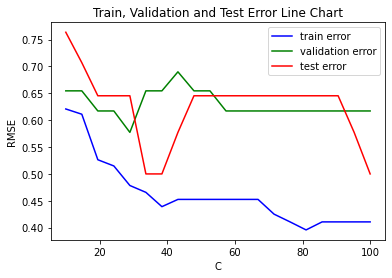

In [9]:
plt.plot(C, rmse_train, color = 'blue', label = 'train error')
plt.plot(C, rmse_val, color = 'green', label = 'validation error')
plt.plot(C, rmse_test, color = 'red', label = 'test error')


plt.title('Train, Validation and Test Error Line Chart')
plt.xlabel('C')
plt.ylabel('RMSE')
plt.legend()
#plt.xlim([0, 100])
#plt.ylim([0, 1])
plt.show()

# 2-B

In [10]:
#get support vectors
clf.support_vectors_

array([[2.90000000e+01, 3.22707878e+01, 8.40000000e+01, 5.81000000e+00,
        1.20383200e+00, 4.56196000e+01, 6.20963500e+00, 2.46033000e+01,
        9.04981000e+02],
       [3.60000000e+01, 3.41748900e+01, 8.00000000e+01, 6.59000000e+00,
        1.30042667e+00, 1.02809000e+01, 5.06591500e+00, 1.57218700e+01,
        5.81313000e+02],
       [2.80000000e+01, 3.58558147e+01, 8.70000000e+01, 8.57600000e+00,
        1.84040960e+00, 6.85102000e+01, 4.79420000e+00, 2.14436600e+01,
        3.58624000e+02],
       [6.80000000e+01, 2.13675214e+01, 7.70000000e+01, 3.22600000e+00,
        6.12724933e-01, 9.88270000e+00, 7.16956000e+00, 1.27660000e+01,
        9.28220000e+02],
       [6.90000000e+01, 2.94000000e+01, 8.90000000e+01, 1.07040000e+01,
        2.34988480e+00, 4.52720000e+01, 8.28630000e+00, 4.53000000e+00,
        2.15769000e+02],
       [5.00000000e+01, 3.85787585e+01, 1.06000000e+02, 6.70300000e+00,
        1.75261107e+00, 4.66401000e+01, 4.66764500e+00, 1.17838800e+01,
        8.8

In [11]:
# get indices of support vectors
clf.support_

array([ 1,  2,  8, 13, 14, 15, 16, 20, 24, 26, 27, 29, 31, 34, 39, 40, 41,
       42, 44, 45, 55, 56, 57, 58, 59, 62, 63, 67, 76, 77, 78, 82,  0,  3,
        4,  5, 10, 12, 23, 25, 30, 32, 35, 38, 43, 46, 47, 48, 50, 51, 52,
       53, 60, 61, 66, 68, 69, 72, 73, 74, 75, 79, 80, 81])

In [12]:
# get number of support vectors for each class
clf.n_support_

array([32, 32])

# 2-C
### Reduced train-dataset to 50% of former value

In [13]:
x_train2, x_val1, y_train2, y_val1 = train_test_split(x_train, y_train, test_size = 0.2)
x_train_reduced, x_garbage, y_train_reduced, y_garbage = train_test_split(x_train2, y_train2, test_size = 0.2)

In [14]:
C = np.linspace(start = 10, stop = 100, num = 20)
C

array([ 10.        ,  14.73684211,  19.47368421,  24.21052632,
        28.94736842,  33.68421053,  38.42105263,  43.15789474,
        47.89473684,  52.63157895,  57.36842105,  62.10526316,
        66.84210526,  71.57894737,  76.31578947,  81.05263158,
        85.78947368,  90.52631579,  95.26315789, 100.        ])

In [15]:
rmse_train1 = []
rmse_val1 = []
rmse_test1 = []

for c in C:
    clf1 = svm.SVC(kernel='rbf', gamma='scale', C=c)
    clf1.fit(x_train_reduced, y_train_reduced)

    y_train_pred = clf1.predict(x_train_reduced)
    train__rmse1 = rmse_train1.append(np.sqrt(mean_squared_error(y_train_reduced, y_train_pred)))

    y_val_pred = clf1.predict(x_val1)
    val__rmse1 = rmse_val1.append(np.sqrt(mean_squared_error(y_val1, y_val_pred)))

    y_test_pred = clf1.predict(x_test)
    test__rmse1 = rmse_test1.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

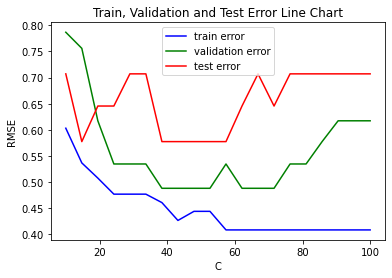

In [16]:
plt.plot(C, rmse_train1, color = 'blue', label = 'train error')
plt.plot(C, rmse_val1, color = 'green', label = 'validation error')
plt.plot(C, rmse_test1, color = 'red', label = 'test error')


plt.title('Train, Validation and Test Error Line Chart')
plt.xlabel('C')
plt.ylabel('RMSE')
plt.legend()
#plt.xlim([0, 100])
#plt.ylim([0, 1])
plt.show()